In [2]:
import os
os.chdir("E:")

Importing Library

In [4]:
import pandas as pd
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib as mpl
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0
import matplotlib.pyplot as plt        # For plotting graphs
%matplotlib inline
import seaborn as sns
from fancyimpute import KNN
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

Matplotlib version:  2.2.2


In [100]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer
from sklearn import linear_model
import xgboost as xgb
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

Reading File

In [6]:
train = pd.read_excel("Absenteeism_at_work_Project.xls")

Understanding the Data

In [7]:
train.shape

(740, 21)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null int64
Reason for absence                 737 non-null float64
Month of absence                   739 non-null float64
Day of the week                    740 non-null int64
Seasons                            740 non-null int64
Transportation expense             733 non-null float64
Distance from Residence to Work    737 non-null float64
Service time                       737 non-null float64
Age                                737 non-null float64
Work load Average/day              730 non-null float64
Hit target                         734 non-null float64
Disciplinary failure               734 non-null float64
Education                          730 non-null float64
Son                                734 non-null float64
Social drinker                     737 non-null float64
Social smoker                      736 non-null float64
Pet  

In [9]:
train.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


CONVERT THE VARIABLE TO ITS APPROPRIATE DATA TYPE

In [10]:
train['Month of absence'] = train['Month of absence'].astype(object)
train['Day of the week'] = train['Day of the week'].astype(object)
train['Seasons'] = train['Seasons'].astype(object)
train['Education'] = train['Education'].astype(object)
train['Son'] = train['Son'].astype(object)
train['Social drinker'] = train['Social drinker'].astype(object)
train['Social smoker'] = train['Social smoker'].astype(object)
train['Pet'] = train['Pet'].astype(object)

UNIVARIATE ANALYSIS

Target Variable

[656  19  21   7   3   3   3   0   1   5]
[  0.  12.  24.  36.  48.  60.  72.  84.  96. 108. 120.]


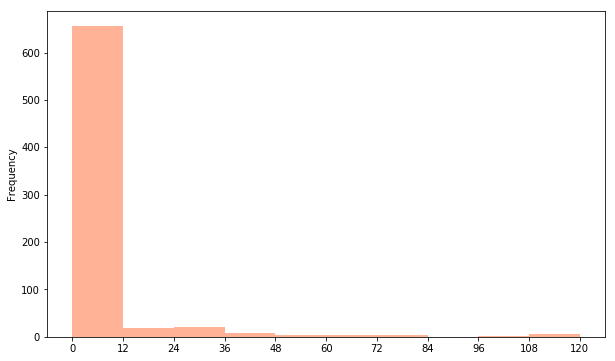

In [11]:
count,bin_edges=np.histogram(train['Absenteeism time in hours'].dropna())
train['Absenteeism time in hours'].plot(kind='hist',figsize=(10,6),bins=10,alpha=0.6,
                                    xticks=bin_edges,
                                    color=['coral', 'darkslateblue', 'mediumseagreen'],
                                   stacked=True)
                                
print(count)
print(bin_edges)

INDEPENDENT CONTINOUS VARIABLE

[143  33  74  51  75  48  94  88  20 114]
[ 1.   4.5  8.  11.5 15.  18.5 22.  25.5 29.  32.5 36. ]


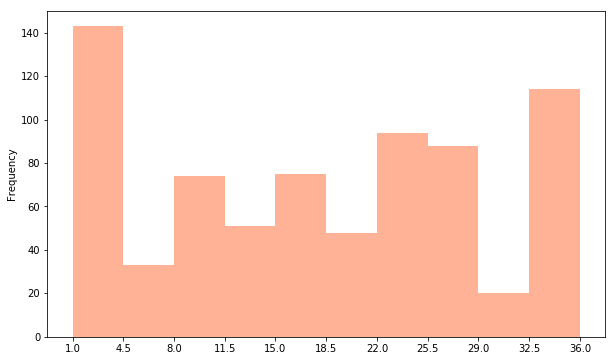

In [12]:
count,bin_edges=np.histogram(train['ID'])
train['ID'].plot(kind='hist',figsize=(10,6),bins=10,alpha=0.6,
                                    xticks=bin_edges,
                                    color=['coral', 'darkslateblue', 'mediumseagreen'],
                                   stacked=True)
                                
print(count)
print(bin_edges)

[ 60   6  29  55  63  24  62  43 183 212]
[ 0.   2.8  5.6  8.4 11.2 14.  16.8 19.6 22.4 25.2 28. ]


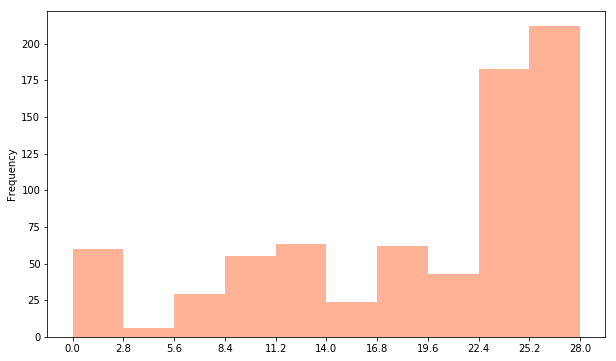

In [13]:
count,bin_edges=np.histogram(train['Reason for absence'].dropna())
train['Reason for absence'].plot(kind='hist',figsize=(10,6),bins=10,alpha=0.6,
                                    xticks=bin_edges,
                                    color=['coral', 'darkslateblue', 'mediumseagreen'],
                                   stacked=True)
                                
print(count)
print(bin_edges)

[ 92  36 193  81 128  49  89  16   0  49]
[118. 145. 172. 199. 226. 253. 280. 307. 334. 361. 388.]


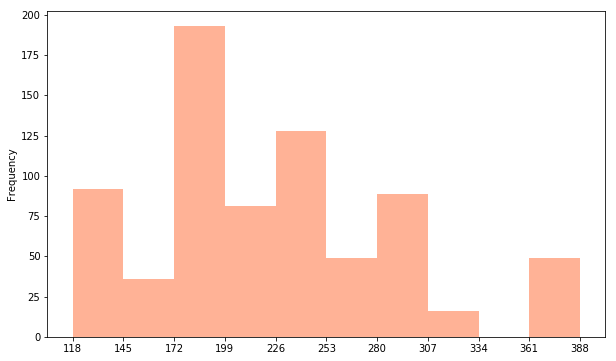

In [14]:
count,bin_edges=np.histogram(train['Transportation expense'].dropna())
train['Transportation expense'].plot(kind='hist',figsize=(10,6),bins=10,alpha=0.6,
                                    xticks=bin_edges,
                                    color=['coral', 'darkslateblue', 'mediumseagreen'],
                                   stacked=True)
                                
print(count)
print(bin_edges)

[  6 152  50  39 187  51  42   7   1 202]
[ 5.   9.7 14.4 19.1 23.8 28.5 33.2 37.9 42.6 47.3 52. ]


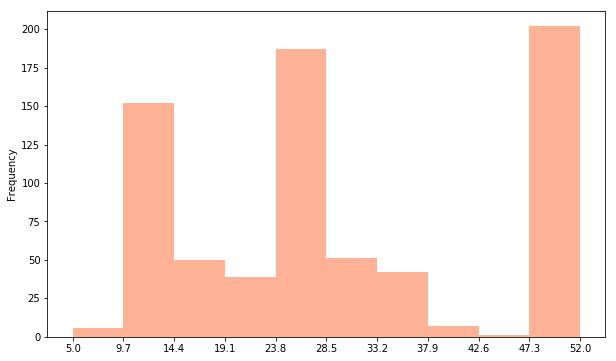

In [15]:
count,bin_edges=np.histogram(train['Distance from Residence to Work'].dropna())
train['Distance from Residence to Work'].plot(kind='hist',figsize=(10,6),bins=10,alpha=0.6,
                                    xticks=bin_edges,
                                    color=['coral', 'darkslateblue', 'mediumseagreen'],
                                   stacked=True)
                                
print(count)
print(bin_edges)

[  6 152  50  39 187  51  42   7   1 202]
[ 5.   9.7 14.4 19.1 23.8 28.5 33.2 37.9 42.6 47.3 52. ]


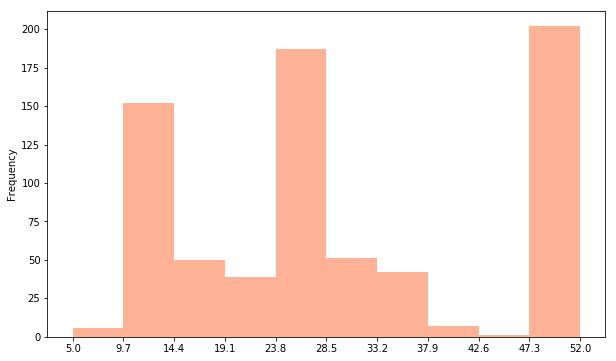

In [16]:
count,bin_edges=np.histogram(train['Distance from Residence to Work'].dropna())
train['Distance from Residence to Work'].plot(kind='hist',figsize=(10,6),bins=10,alpha=0.6,
                                    xticks=bin_edges,
                                    color=['coral', 'darkslateblue', 'mediumseagreen'],
                                   stacked=True)
                                
print(count)
print(bin_edges)

[ 31  23 145 164 158  62 147   0   2   5]
[ 1.   3.8  6.6  9.4 12.2 15.  17.8 20.6 23.4 26.2 29. ]


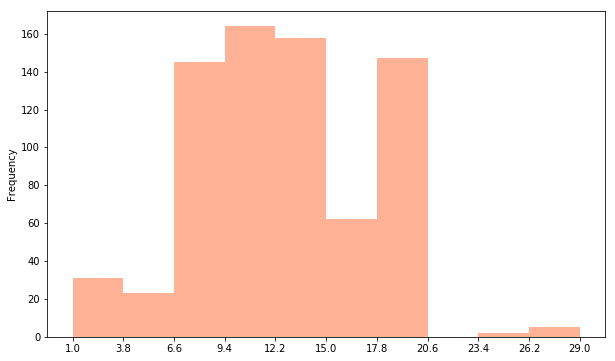

In [17]:
count,bin_edges=np.histogram(train['Service time'].dropna())
train['Service time'].plot(kind='hist',figsize=(10,6),bins=10,alpha=0.6,
                                    xticks=bin_edges,
                                    color=['coral', 'darkslateblue', 'mediumseagreen'],
                                   stacked=True)
                                
print(count)
print(bin_edges)

[176  86  79 199  90  24  32  42   1   8]
[27.  30.1 33.2 36.3 39.4 42.5 45.6 48.7 51.8 54.9 58. ]


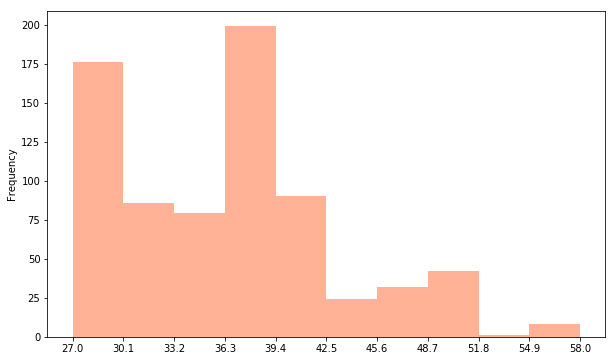

In [18]:
count,bin_edges=np.histogram(train['Age'].dropna())
train['Age'].plot(kind='hist',figsize=(10,6),bins=10,alpha=0.6,
                                    xticks=bin_edges,
                                    color=['coral', 'darkslateblue', 'mediumseagreen'],
                                   stacked=True)
                                
print(count)
print(bin_edges)

In [19]:
count,bin_edges=np.histogram(train['Work load Average/day'].dropna())
train['Work load Average/day'].plot(kind='hist',figsize=(10,6),bins=10,alpha=0.6,
                                    xticks=bin_edges,
                                    color=['coral', 'darkslateblue', 'mediumseagreen'],
                                   stacked=True)
                                
print(count)
print(bin_edges)

KeyError: 'Work load Average/day'

[ 19   0   0  40   0 124 139 150 155 113]
[ 81.   82.9  84.8  86.7  88.6  90.5  92.4  94.3  96.2  98.1 100. ]


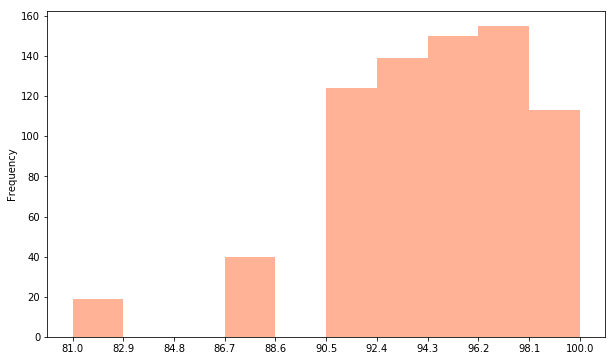

In [99]:
count,bin_edges=np.histogram(train['Hit target'].dropna())
train['Hit target'].plot(kind='hist',figsize=(10,6),bins=10,alpha=0.6,
                                    xticks=bin_edges,
                                    color=['coral', 'darkslateblue', 'mediumseagreen'],
                                   stacked=True)
                                
print(count)
print(bin_edges)

[ 52  81 143  59  33  95 182  33  37  24]
[ 56.   61.2  66.4  71.6  76.8  82.   87.2  92.4  97.6 102.8 108. ]


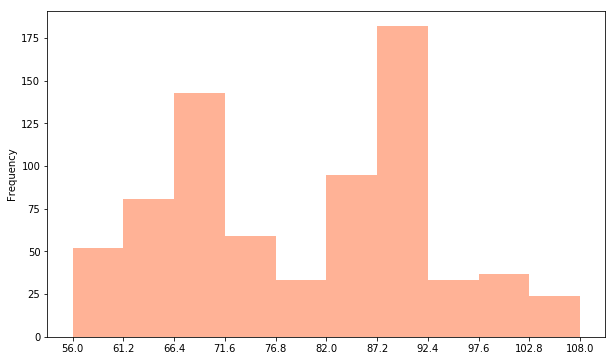

In [20]:
count,bin_edges=np.histogram(train['Weight'].dropna())
train['Weight'].plot(kind='hist',figsize=(10,6),bins=10,alpha=0.6,
                                    xticks=bin_edges,
                                    color=['coral', 'darkslateblue', 'mediumseagreen'],
                                   stacked=True)
                                
print(count)
print(bin_edges)

[ 30 171 396  16  57  20   7   0   0  29]
[163.  166.3 169.6 172.9 176.2 179.5 182.8 186.1 189.4 192.7 196. ]


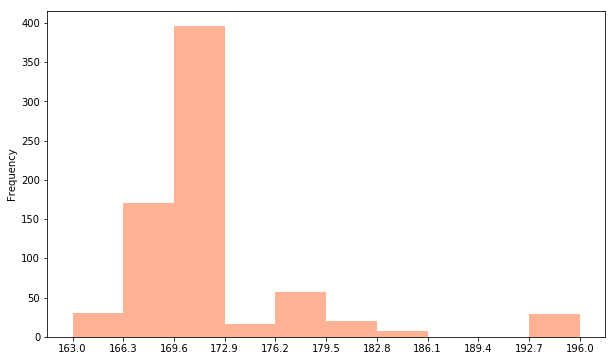

In [21]:
count,bin_edges=np.histogram(train['Height'].dropna())
train['Height'].plot(kind='hist',figsize=(10,6),bins=10,alpha=0.6,
                                    xticks=bin_edges,
                                    color=['coral', 'darkslateblue', 'mediumseagreen'],
                                   stacked=True)
                                
print(count)
print(bin_edges)

[ 45  55 150 122  80  60 166   6   7  18]
[19.  20.9 22.8 24.7 26.6 28.5 30.4 32.3 34.2 36.1 38. ]


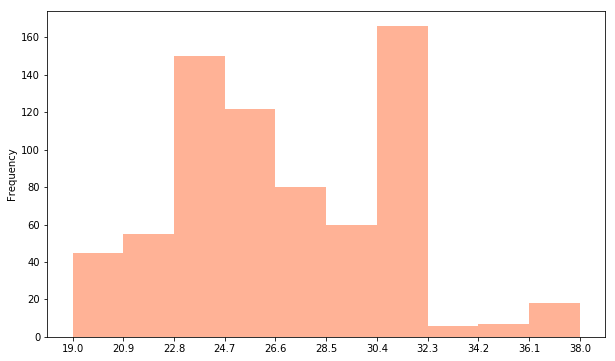

In [22]:
count,bin_edges=np.histogram(train['Body mass index'].dropna())
train['Body mass index'].plot(kind='hist',figsize=(10,6),bins=10,alpha=0.6,
                                    xticks=bin_edges,
                                    color=['coral', 'darkslateblue', 'mediumseagreen'],
                                   stacked=True)
                                
print(count)
print(bin_edges)

INDEPENDENT CATEGORICAL VARIABLE

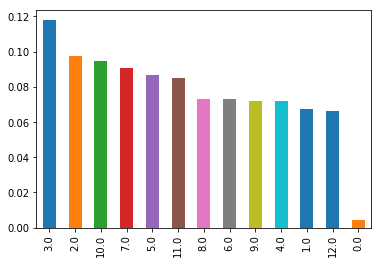

In [23]:
train['Month of absence'].value_counts(normalize=True).plot.bar()

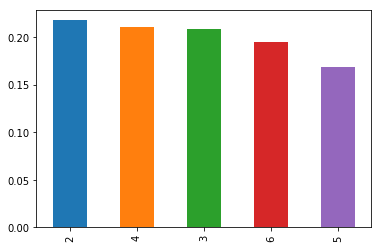

In [24]:
train['Day of the week'].value_counts(normalize=True).plot.bar()

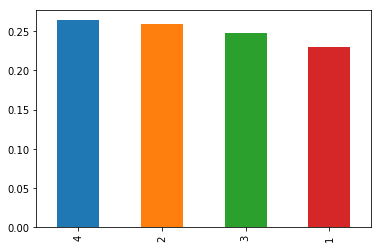

In [25]:
train['Seasons'].value_counts(normalize=True).plot.bar()

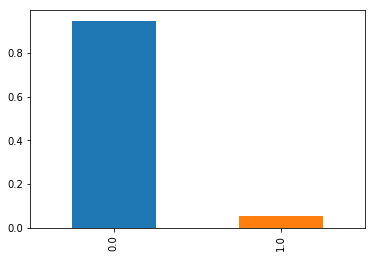

In [26]:
train['Disciplinary failure'].value_counts(normalize=True).plot.bar()

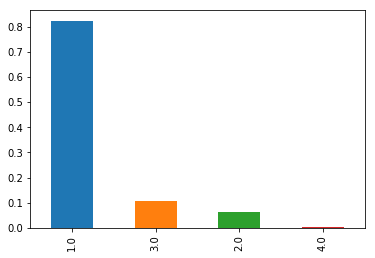

In [27]:
train['Education'].value_counts(normalize=True).plot.bar()

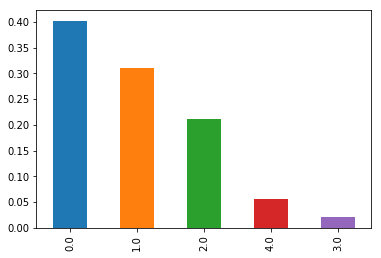

In [28]:
train['Son'].value_counts(normalize=True).plot.bar()

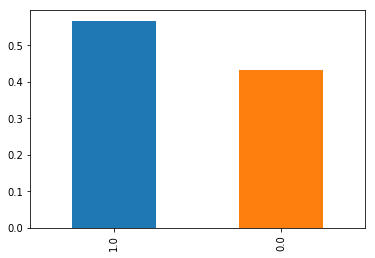

In [29]:
train['Social drinker'].value_counts(normalize=True).plot.bar()

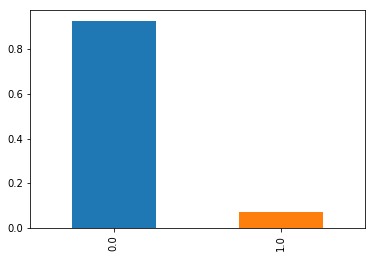

In [30]:
train['Social smoker'].value_counts(normalize=True).plot.bar()

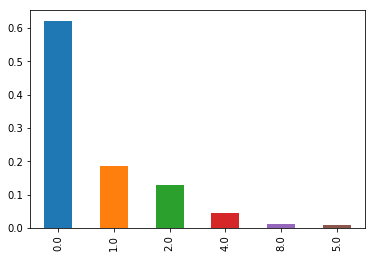

In [31]:
train['Pet'].value_counts(normalize=True).plot.bar()

BIVARIATE ANALYSIS

-0.02094231843709994

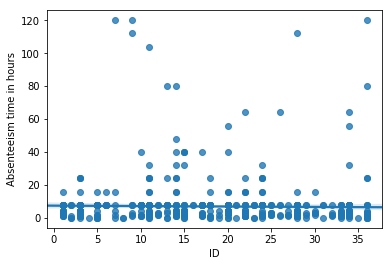

In [32]:
#correlation between ID and Absenteeism time in hours
sns.regplot(x = "ID", y = "Absenteeism time in hours", data = train)
train['ID'].corr(train['Absenteeism time in hours'])

-0.20451916848396326

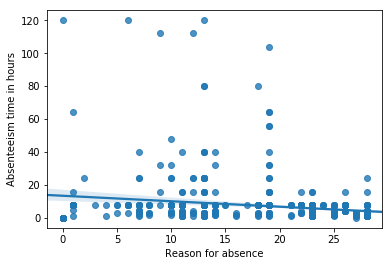

In [33]:
#correlation between Reason for absence and Absenteeism time in hours
sns.regplot(x = "Reason for absence", y = "Absenteeism time in hours", data = train)
train['Reason for absence'].corr(train['Absenteeism time in hours'])

0.047216341711840755

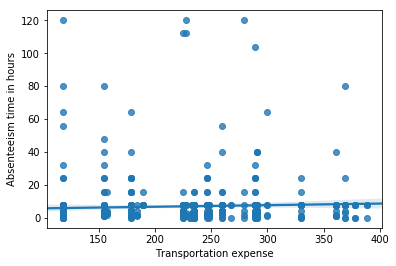

In [34]:
#correlation between Transportation expence and Absenteeism time in hours
sns.regplot(x = "Transportation expense", y = "Absenteeism time in hours", data = train)
train['Transportation expense'].corr(train['Absenteeism time in hours'])

-0.10296652050148393

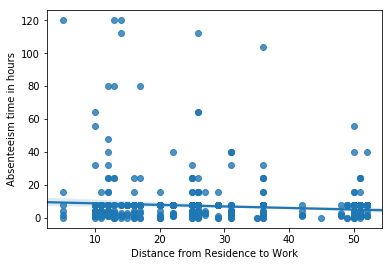

In [35]:
#correlation between Distance from residence to Work and Absenteeism time in hours
sns.regplot(x = "Distance from Residence to Work", y = "Absenteeism time in hours", data = train)
train['Distance from Residence to Work'].corr(train['Absenteeism time in hours'])

0.016559811584038266

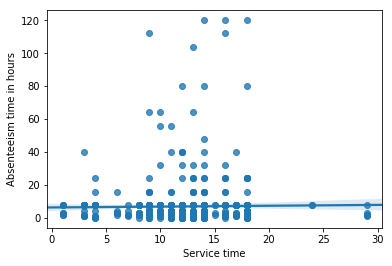

In [36]:
#correlation between Service time and Absenteeism time in hour
sns.regplot(x = "Service time", y = "Absenteeism time in hours", data = train)
train['Service time'].corr(train['Absenteeism time in hours'])

0.07797781921426594

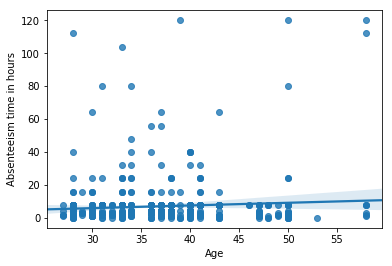

In [37]:
#correlation between Age and Absenteeism time in hours
sns.regplot(x = "Age", y = "Absenteeism time in hours", data = train)
train['Age'].corr(train['Absenteeism time in hours'])

In [38]:
#correlation between work load Average/day and Absenteeism time in hours
sns.regplot(x = "Work load Average/day", y = "Absenteeism time in hours", data = train)
train['Work load Average/day'].corr(train['Absenteeism time in hours'])

KeyError: 'Work load Average/day'

0.022311184691788274

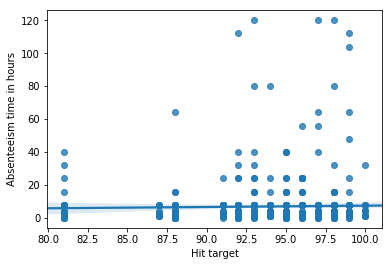

In [39]:
#Correlation between Hit target and Absenteeism time in hours
sns.regplot(x = "Hit target", y = "Absenteeism time in hours", data = train)
train['Hit target'].corr(train['Absenteeism time in hours'])

-0.009275274704154091

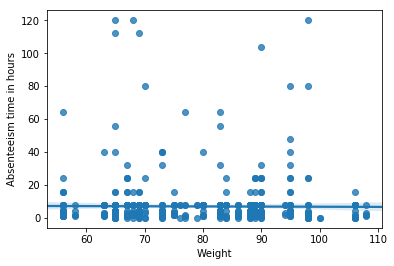

In [40]:
#correlation between Weight and Absenteeism time in hours
sns.regplot(x = "Weight", y = "Absenteeism time in hours", data = train)
train['Weight'].corr(train['Absenteeism time in hours'])

0.09477205277715797

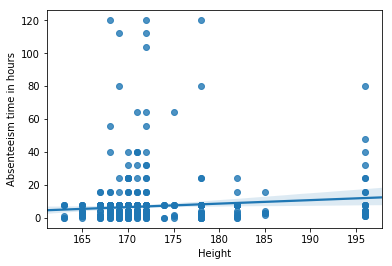

In [41]:
#correlation between Height and Absenteeism time in hours
sns.regplot(x = "Height", y = "Absenteeism time in hours", data = train)
train['Height'].corr(train['Absenteeism time in hours'])

-0.05908351198731687

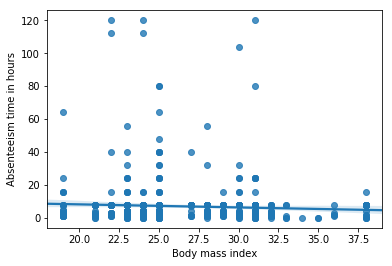

In [42]:
#correlation between Body Mass index and Absenteeism time in hours
sns.regplot(x = "Body mass index", y = "Absenteeism time in hours", data = train)
train['Body mass index'].corr(train['Absenteeism time in hours'])

In [43]:
#Box plot for continous and categorical variables

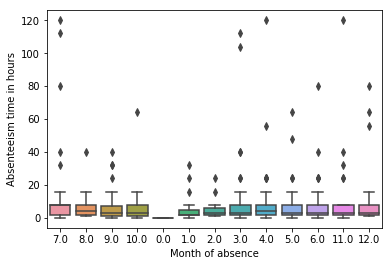

In [44]:
sns.boxplot(x = "Month of absence", y = "Absenteeism time in hours", data = train)

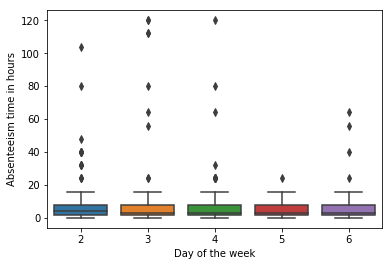

In [45]:
sns.boxplot(x = "Day of the week", y = "Absenteeism time in hours", data = train)

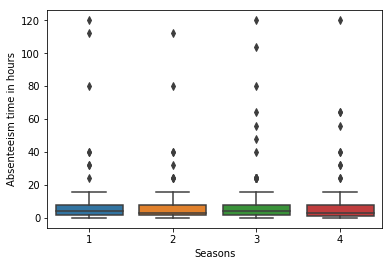

In [46]:
sns.boxplot(x = "Seasons", y = "Absenteeism time in hours", data = train)

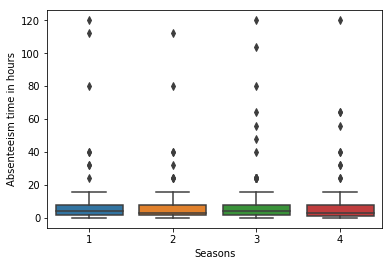

In [47]:
sns.boxplot(x = "Seasons", y = "Absenteeism time in hours", data = train)

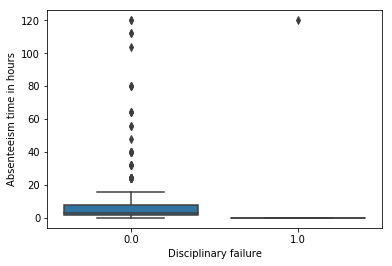

In [48]:
sns.boxplot(x = "Disciplinary failure", y = "Absenteeism time in hours", data = train)

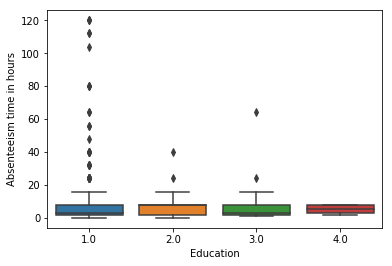

In [49]:
sns.boxplot(x = "Education", y = "Absenteeism time in hours", data = train)

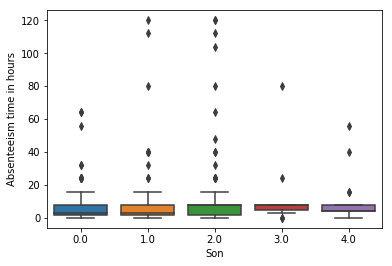

In [50]:
sns.boxplot(x = "Son", y = "Absenteeism time in hours", data = train)

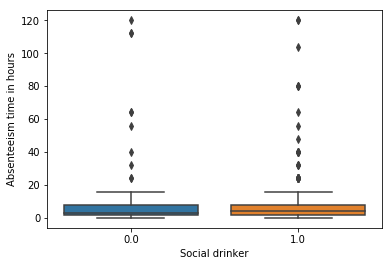

In [51]:
sns.boxplot(x = "Social drinker", y = "Absenteeism time in hours", data = train)

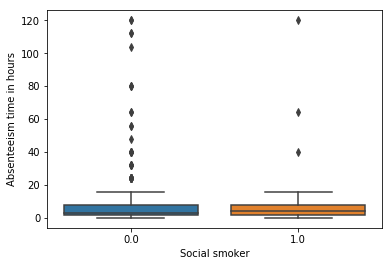

In [52]:
sns.boxplot(x = "Social smoker", y = "Absenteeism time in hours", data = train)

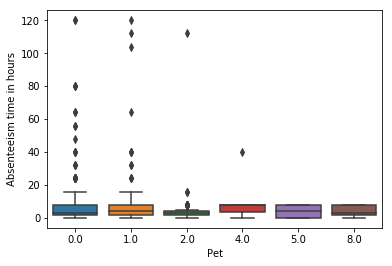

In [53]:
sns.boxplot(x = "Pet", y = "Absenteeism time in hours", data = train)

MISSING VALUE ANALYSIS

In [57]:
#Create dataframe with missing percentage
missing_val = pd.DataFrame(train.isnull().sum())

#Reset index
missing_val = missing_val.reset_index()

#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

#Calculate percentage
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(train))*100

#descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)
missing_val

,Variables,Missing_percentage
0,Body mass index,4.189189
1,Absenteeism time in hours,2.972973
2,Work load Average/day,1.351351
3,Education,1.351351
4,Transportation expense,0.945946
5,Son,0.810811
6,Disciplinary failure,0.810811
7,Hit target,0.810811
8,Social smoker,0.540541
9,Age,0.405405


In [58]:
#Imputing Weight and Height with mean for missing values
train['Weight'] = train['Weight'].fillna(train['Weight'].mean())
train['Height'] = train['Height'].fillna(train['Height'].mean())

In [59]:
#Imputing Body Mass Index
for i in range(len(train)):
    if(train['Body mass index'].iloc[i] == np.nan):
        train['Body mass index'].iloc[i] = (train['Weight'].iloc[i]) * 10000/(train['Height'].iloc[i])**2 

In [60]:
#Replacing 0 value of month and Reason for Absence ti NA
for i in range(len(train)):
    if(train['Month of absence'].iloc[i] == 0):
        train['Month of absence'].iloc[i] = np.nan

In [61]:
for i in range(len(train)):
    if(train['Reason for absence'].iloc[i] == 0):
        train['Reason for absence'].iloc[i] = np.nan

In [62]:
#KNN imputation
#Assigning levels to the categories
lis = []
for i in range(0, train.shape[1]):
    if(train.iloc[:,i].dtypes == 'object'):
        train.iloc[:,i] = pd.Categorical(train.iloc[:,i])
        train.iloc[:,i] = train.iloc[:,i].cat.codes 
        train.iloc[:,i] = train.iloc[:,i].astype('object')
        
        lis.append(train.columns[i])
        

In [63]:
#replace -1 with NA to impute
for i in range(0, train.shape[1]):
    train.iloc[:,i] = train.iloc[:,i].replace(-1, np.nan) 

In [64]:
#Apply KNN imputation algorithm
train = pd.DataFrame(KNN(k = 3).complete(train), columns = train.columns)

Imputing row 1/740 with 0 missing, elapsed time: 0.173
Imputing row 101/740 with 1 missing, elapsed time: 0.173
Imputing row 201/740 with 0 missing, elapsed time: 0.173
Imputing row 301/740 with 1 missing, elapsed time: 0.173
Imputing row 401/740 with 1 missing, elapsed time: 0.173
Imputing row 501/740 with 0 missing, elapsed time: 0.173
Imputing row 601/740 with 0 missing, elapsed time: 0.173
Imputing row 701/740 with 0 missing, elapsed time: 0.188


In [65]:
#Convert into proper datatypes
for i in lis:
    train.loc[:,i] = train.loc[:,i].round()
    train.loc[:,i] = train.loc[:,i].astype('object')

FEATURE SELEACTION

In [66]:
#Saving the numerical data
cnames = ["ID","Reason for absence","Transportation expense","Service time","Work load Average/day","Hit target","Weight",
         "Height","Body mass index","Age"]

In [67]:
##Correlation analysis
#Correlation plot
df_corr = train.loc[:,cnames]

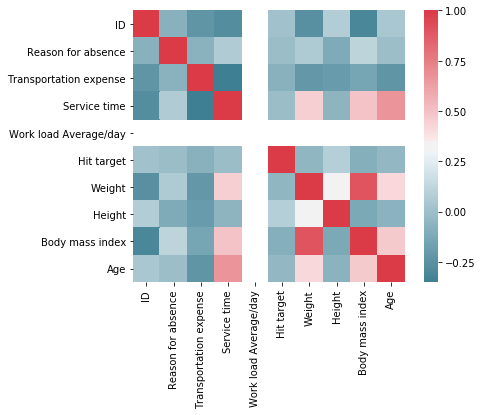

In [68]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [69]:
train = train.drop(['ID','Service time','Weight','Work load Average/day','Hit target','Month of absence','Pet'], axis=1)

KeyError: "labels ['Work load Average/day'] not contained in axis"

FEATURE SCALING

In [70]:
cnames = ["Reason for absence","Distance from Residence to Work","Age","Transportation expense","Height","Body mass index"]

In [73]:
#Nomalisation
for i in cnames:
    print(i)
    train[i] = (train[i] - min(train[i]))/(max(train[i]) - min(train[i]))

Reason for absence
Distance from Residence to Work
Age
Transportation expense
Height
Body mass index


# MODEL DEVELOPMENT

In [74]:
features = ["Reason for absence","Day of the week","Seasons","Transportation expense","Distance from Residence to Work","Age","Disciplinary failure",
           "Education","Son","Social drinker","Social smoker","Height","Body mass index"]

In [75]:
X = train[features]
Y = train['Absenteeism time in hours']

In [76]:
#Decision Tree Model
# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, Y, random_state = 0)
# Define model
model1 = DecisionTreeRegressor()
# Fit model
model1.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = model1.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

5.804917840117754


In [77]:
lm = linear_model.LinearRegression()
model = lm.fit(train_X,train_y)

predictions = lm.predict(val_X)

print(mean_absolute_error(val_y, predictions))

6.223049938897581


In [78]:
#Tunning the Decision Tree Model
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model2 = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model2.fit(train_X, train_y)
    preds_val = model2.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [79]:
# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  5
Max leaf nodes: 50  		 Mean Absolute Error:  6
Max leaf nodes: 500  		 Mean Absolute Error:  6
Max leaf nodes: 5000  		 Mean Absolute Error:  6


In [80]:
#Random Forest Model
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, preds))

5.335445445730084


In [81]:
#Pipeline
my_pipeline = make_pipeline(Imputer(), RandomForestRegressor())

In [82]:
my_pipeline.fit(train_X, train_y)
predictions = my_pipeline.predict(val_X)
print(mean_absolute_error(val_y, predictions))

5.130152679679039


In [83]:
my_imputer = Imputer()
my_model = RandomForestRegressor()

imputed_train_X = my_imputer.fit_transform(train_X)
imputed_val_X = my_imputer.transform(val_X)
my_model.fit(imputed_train_X, train_y)
predictions = my_model.predict(imputed_val_X)
print(mean_absolute_error(val_y, predictions))

5.205705672679598


In [84]:
#Cross-validation
my_pipeline = make_pipeline(Imputer(), RandomForestRegressor())

In [85]:
scores = cross_val_score(my_pipeline, X, Y, scoring='neg_mean_absolute_error')
print(scores)

[-6.76454233 -6.73761539 -5.87602523]


In [86]:
print('Mean Absolute Error %2f' %(-1 * scores.mean()))

Mean Absolute Error 6.459394


In [87]:
#XGBoost Model
for f in X.columns: 
    if X[f].dtype=='object': 
        lbl = preprocessing.LabelEncoder() 
        lbl.fit(list(X[f].values)) 
        X[f] = lbl.transform(list(X[f].values))

X.fillna((-999), inplace=True)

X=np.array(X) 
Y=np.array(Y) 
X = X.astype(float) 
Y = Y.astype(float)

In [88]:
data_dmatrix = xgb.DMatrix(data=X,label=Y)

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

In [90]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [91]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

In [92]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 9.158339


In [93]:
#K-folds cross validation
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[11:19:00] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[11:19:00] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=4
[11:19:00] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[11:19:00] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=5
[11:19:00] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[11:19:00] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=4
[11:19:00] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning en

In [94]:
cv_results.head()

,test-rmse-mean,test-rmse-std,train-rmse-mean,train-rmse-std
0,13.938821,4.062446,14.279630,2.223436
1,13.674870,4.085480,13.998130,2.219701
2,13.406499,4.124457,13.669307,2.158120
3,13.229862,4.132964,13.447639,2.143898
4,13.071649,4.140425,13.157791,2.072143


In [95]:
#Extract and print the final boosting round metric
print((cv_results["test-rmse-mean"]).tail(1))

30    11.862074
Name: test-rmse-mean, dtype: float64


In [96]:
#Visualize Boosting Trees and Feature Importance
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=30)

[11:19:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[11:19:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=5
[11:19:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[11:19:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=5
[11:19:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=5
[11:19:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[11:19:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning en

ExecutableNotFound: failed to execute ['dot', '-Tpng'], make sure the Graphviz executables are on your systems' PATH

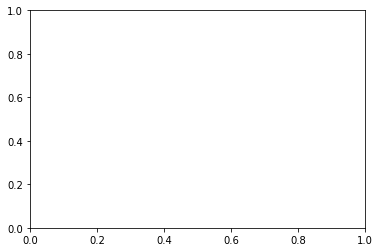

In [97]:
xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

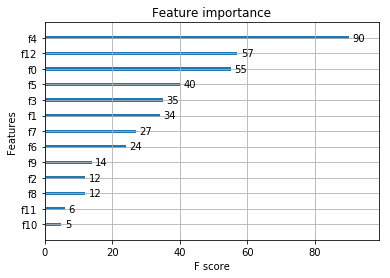

In [98]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()